In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
%matplotlib inline
sns.set(style="whitegrid")


In [5]:
!pip install openpyxl


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)


In [20]:
df = pd.read_excel(
    '/Users/juanpardo/Downloads/covid-fci-data.xlsx',
    sheet_name='raw data',
    skiprows=0,     
    header=0        
)



In [21]:
df.head()
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4029 entries, 0 to 4028
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              4029 non-null   int64         
 1   Country Name                    4029 non-null   object        
 2   Country ISO3                    4029 non-null   object        
 3   Income Level                    4029 non-null   object        
 4   Authority                       4029 non-null   object        
 5   Date                            4029 non-null   datetime64[ns]
 6   Level 1 policy measures         4029 non-null   object        
 7   Level 2 policy measures         4029 non-null   object        
 8   Level 3 policy measures         4029 non-null   object        
 9   Details of the measure          4027 non-null   object        
 10  Reference                       4029 non-null   object        
 11  Term

In [22]:
#Erase Duplication Values
df = df.drop_duplicates()


In [23]:
#Review the null values that are missing per column
df.isnull().sum().sort_values(ascending=False)


Parent Measure                    3277
Termination Date                  2730
Details of the measure               2
ID                                   0
Country Name                         0
Country ISO3                         0
Income Level                         0
Authority                            0
Date                                 0
Level 1 policy measures              0
Level 2 policy measures              0
Level 3 policy measures              0
Reference                            0
Modification of Parent Measure       0
dtype: int64

In [24]:
#Additional cleaning set in an structure method
# 1. Drop 'Parent Measure' (not useful for most analyses)
df = df.drop(columns=['Parent Measure'])

# 2. Fill nulls in 'Details of the measure' with placeholder
df['Details of the measure'] = df['Details of the measure'].fillna("No details")

# 3. (Optional) Create duration column where possible
df['Duration (days)'] = (df['Termination Date'] - df['Date']).dt.days


In [25]:
#Verify cleaning structure
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4029 entries, 0 to 4028
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              4029 non-null   int64         
 1   Country Name                    4029 non-null   object        
 2   Country ISO3                    4029 non-null   object        
 3   Income Level                    4029 non-null   object        
 4   Authority                       4029 non-null   object        
 5   Date                            4029 non-null   datetime64[ns]
 6   Level 1 policy measures         4029 non-null   object        
 7   Level 2 policy measures         4029 non-null   object        
 8   Level 3 policy measures         4029 non-null   object        
 9   Details of the measure          4029 non-null   object        
 10  Reference                       4029 non-null   object        
 11  Term

,ID,Country Name,Country ISO3,Income Level,Authority,Date,Level 1 policy measures,Level 2 policy measures,Level 3 policy measures,Details of the measure,Reference,Termination Date,Modification of Parent Measure,Duration (days)
0,1,China,CHN,Upper middle income,SUP,2020-02-01,Banking sector,Operational continuity ...,Blank ...,Require banks and insurance companies to ensur...,http://www.gov.cn/zhengce/zhengceku/2020-02/03...,NaT,No,NaN
1,2,Canada,CAN,High income,CB,2020-03-13,Liquidity/funding,Liquidity (incl FX)/ELA ...,Blank ...,BoC also created a Bankers Acceptance Purchase...,https://www.bankofcanada.ca/markets/market-ope...,2020-10-31,No,232.0
2,3,China,CHN,Upper middle income,CB,2020-02-05,Banking sector,Integrity ...,Other integrity ...,The PBC has issued Notices on AML/CFT requirem...,...,NaT,No,NaN
3,4,Thailand,THA,Upper middle income,CB,2020-02-05,Liquidity/funding,Policy rate ...,Blank ...,BOT cut its benchmark interest rate by 25 basi...,https://www.bot.or.th/English/PressandSpeeches...,NaT,No,NaN
4,5,Russian Federation,RUS,Upper middle income,CB,2020-02-07,Liquidity/funding,Policy rate ...,Blank ...,Policy rates were reduced by 25 basis points t...,https://www.cnbc.com/2020/02/07/reuters-americ...,NaT,No,NaN


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_27380/3418414155.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')


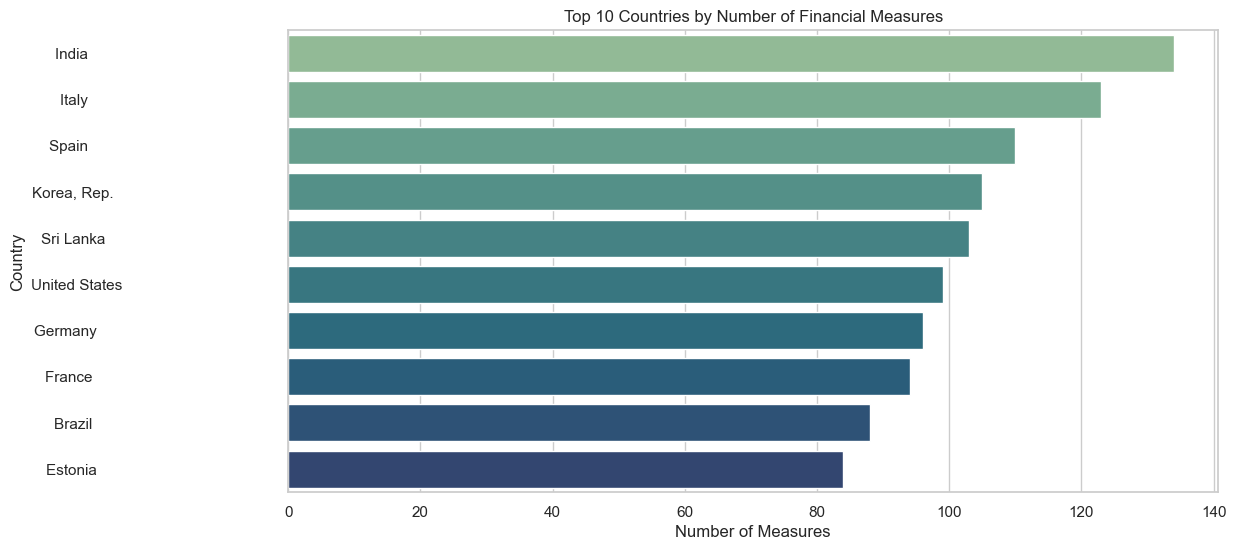

In [26]:
#EDA Analysis: Identification of the top 10 countries that present the highest levels of measures adopted
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
top_countries = df['Country Name'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')
plt.title("Top 10 Countries by Number of Financial Measures")
plt.xlabel("Number of Measures")
plt.ylabel("Country")
plt.show()


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_27380/3436618703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Authority', order=df['Authority'].value_counts().index, palette='flare')


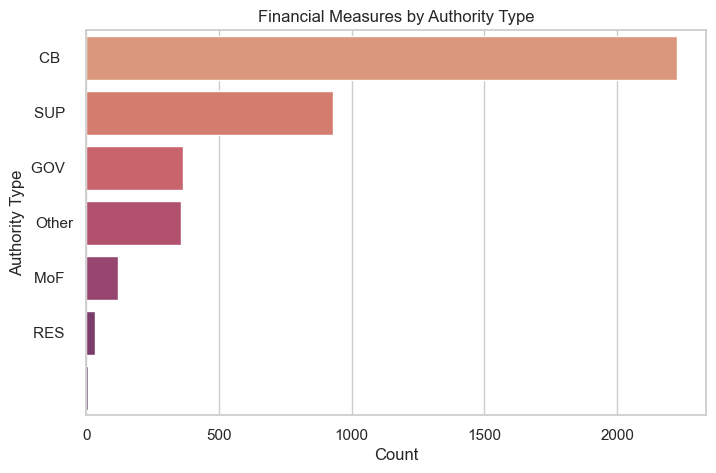

In [27]:
#EDA Analysis: Distribution of measures per authority type 
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Authority', order=df['Authority'].value_counts().index, palette='flare')
plt.title("Financial Measures by Authority Type")
plt.xlabel("Count")
plt.ylabel("Authority Type")
plt.show()


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_27380/498325895.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Income Level', order=df['Income Level'].value_counts().index, palette='mako')


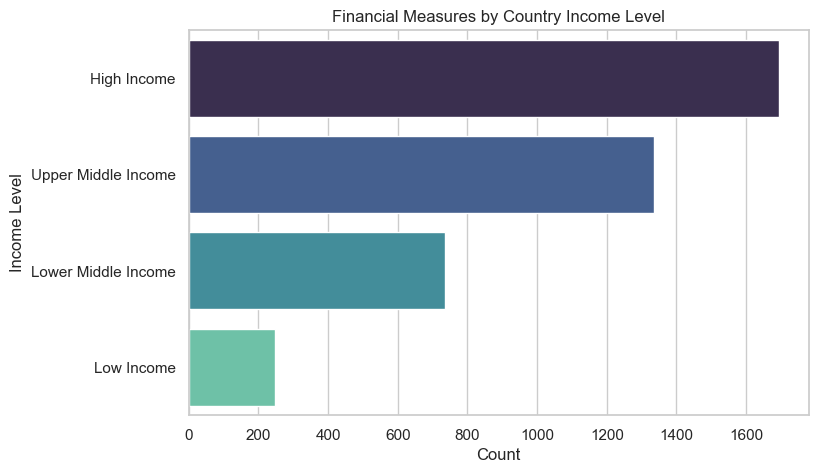

In [31]:
#EDA Analysis: Distribution per income level per country
# Standardize income level text
df['Income Level'] = df['Income Level'].str.strip().str.lower().str.title()

# Optional: remove non-country categories like 'Aggregates'
df = df[~df['Income Level'].isin(['Aggregates'])]

# Redraw the chart
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Income Level', order=df['Income Level'].value_counts().index, palette='mako')
plt.title("Financial Measures by Country Income Level")
plt.xlabel("Count")
plt.ylabel("Income Level")
plt.show()




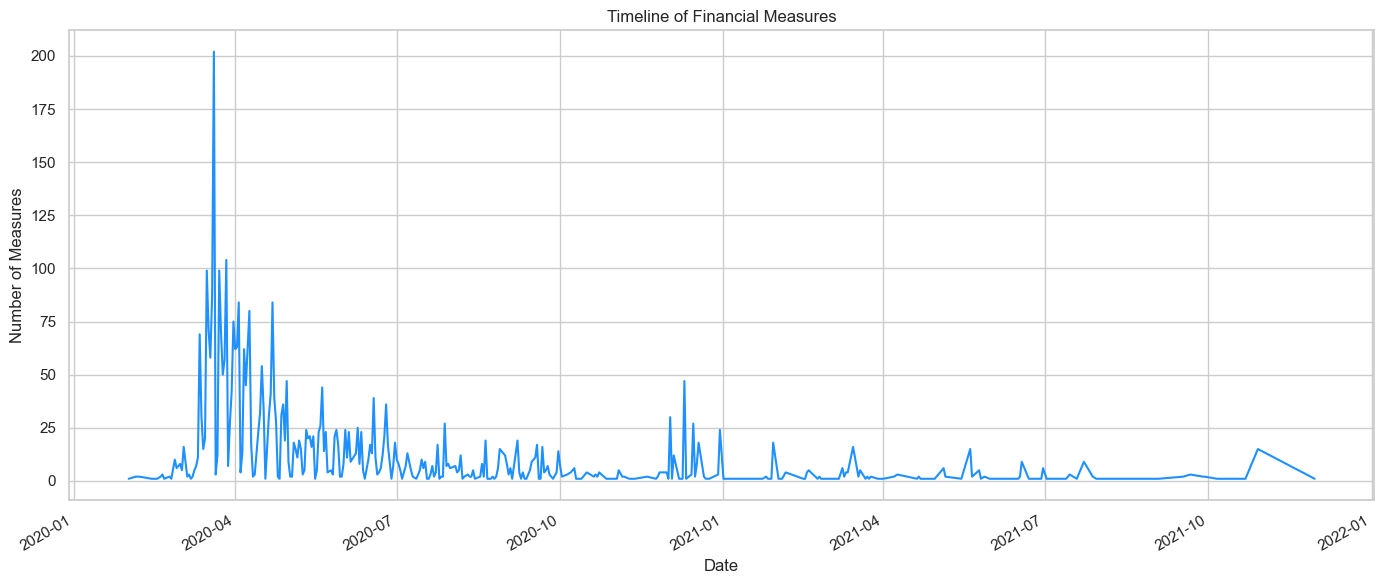

In [29]:
#EDA Analysis: Temporal measure evolution
measures_by_date = df.groupby('Date').size()

plt.figure(figsize=(14,6))
measures_by_date.plot(color='dodgerblue')
plt.title("Timeline of Financial Measures")
plt.xlabel("Date")
plt.ylabel("Number of Measures")
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_27380/1501786025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Level 1 policy measures', order=df['Level 1 policy measures'].value_counts().head(10).index, palette='Set2')


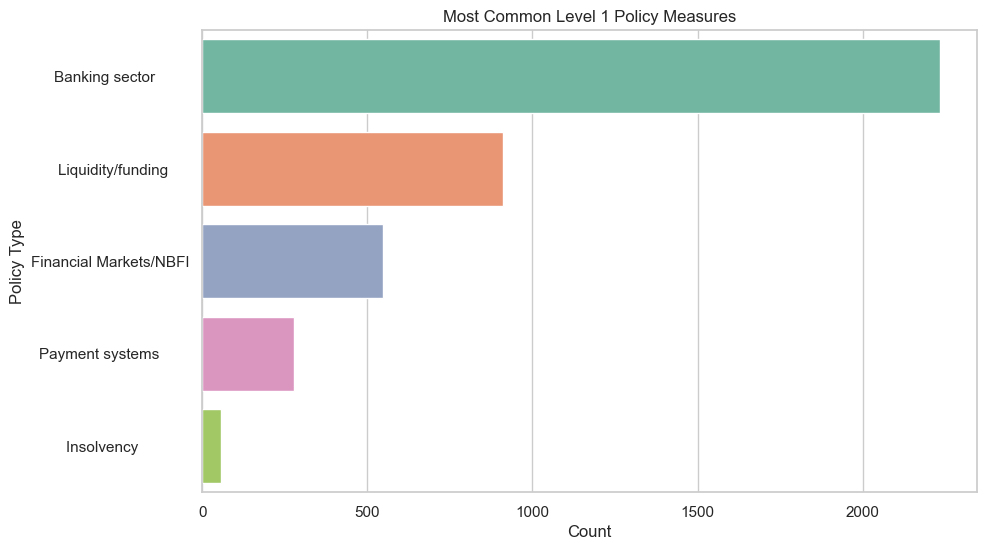

In [30]:
#EDA: Most common presented measures
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Level 1 policy measures', order=df['Level 1 policy measures'].value_counts().head(10).index, palette='Set2')
plt.title("Most Common Level 1 Policy Measures")
plt.xlabel("Count")
plt.ylabel("Policy Type")
plt.show()


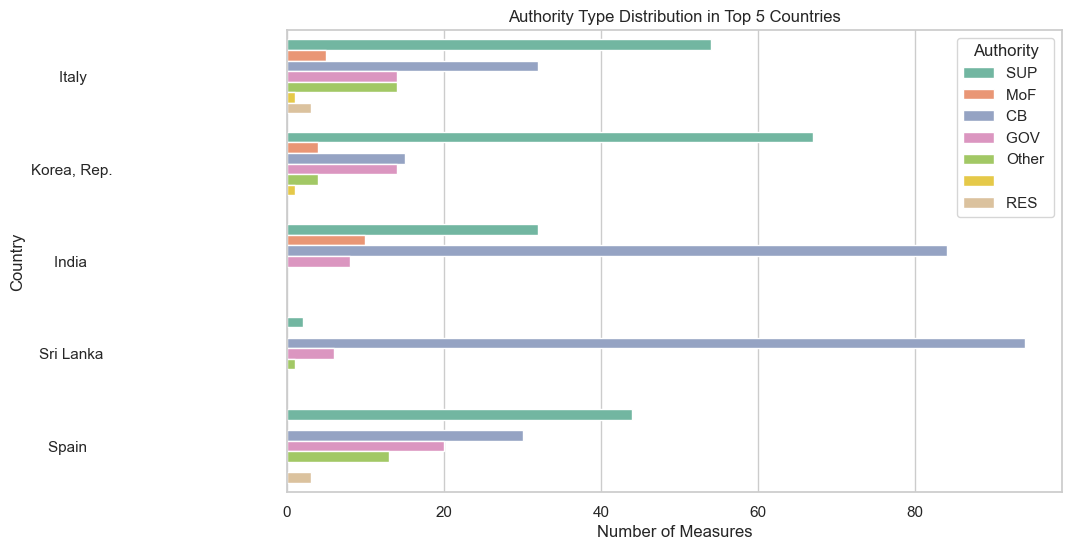

In [32]:
#EDA: Compartative chart between the different autoratity per country
top5 = df['Country Name'].value_counts().head(5).index
subset = df[df['Country Name'].isin(top5)]

plt.figure(figsize=(10,6))
sns.countplot(data=subset, y='Country Name', hue='Authority', palette='Set2')
plt.title("Authority Type Distribution in Top 5 Countries")
plt.xlabel("Number of Measures")
plt.ylabel("Country")
plt.legend(title="Authority")
plt.show()


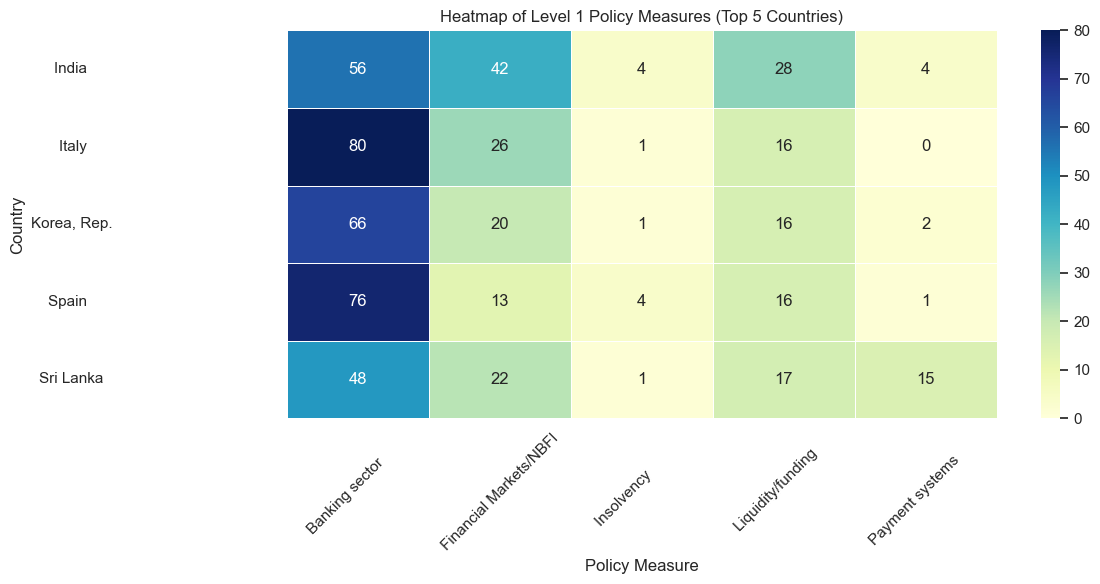

In [33]:
#Heatmap with the usage of policies per country (top 5 countries)
pivot = df[df['Country Name'].isin(top5)].pivot_table(
    index='Country Name', 
    columns='Level 1 policy measures', 
    aggfunc='size', 
    fill_value=0
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Heatmap of Level 1 Policy Measures (Top 5 Countries)")
plt.xlabel("Policy Measure")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In this section, we applied unsupervised learning techniques to identify patterns among countries based on their financial policy responses during COVID-19. The steps taken in order to perform this analysis is mainly focused on the next elements: 

1. We selected categorical variables being them (Authority, Income, Level and Level 1 policy measures) and converted them into numerical format using one-hot encoding. 

2. We applied PCA (Principal Component Analysis) to reduce dimensionality and visualizar the data in 2D. 

3. Using K-means clustering, we grouped countries into 4 clusters based on policy similarity. 

4. Finally, we visualized the clusters in a 2D PCA space using a color-coded scatterplot.

Insights Analysis: 

1. Countries grouped together tend to share income levels an institutional policy references. 
2. Some clusters reveal a consistent pattern of monetary policy use, while others show mixed responses. 
3. This technique can help identify strategic alliances or policy diffusion patterns across income brackets. 

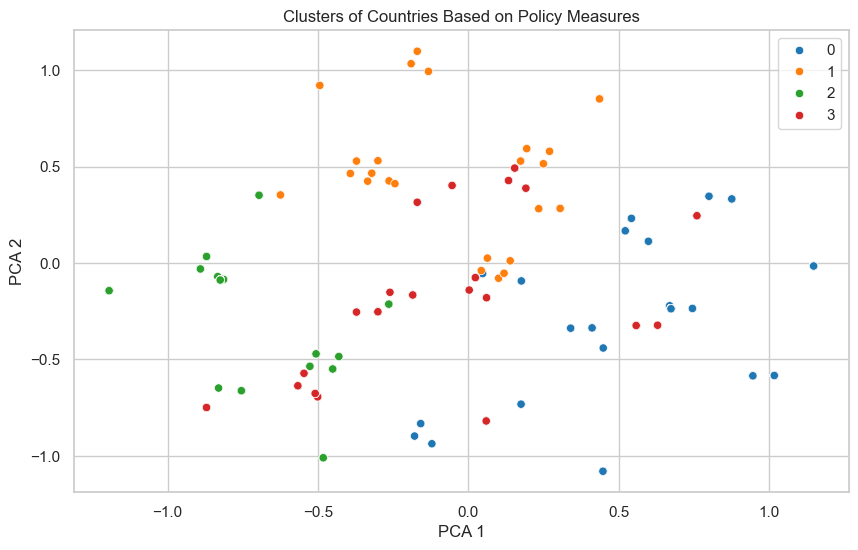

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Encode categorical variables
categorical_cols = ['Authority', 'Income Level', 'Level 1 policy measures']
df_encoded = pd.get_dummies(df[categorical_cols])

# 2. PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_encoded)

# 3. KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(df_encoded)

# 4. Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=labels, palette='tab10')
plt.title("Clusters of Countries Based on Policy Measures")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


## 🎯 Objective

In this section, we aim to predict the type of financial policy measure (Level 1 policy measures)
taken by a country during the COVID-19 pandemic using features such as income level, country authority,
and other contextual data.

This is a multi-class classification problem, and we will use Random Forest as our baseline model.


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Select features and target
features = ['Income Level', 'Authority']
target = 'Level 1 policy measures'

# Encode features
df_model = pd.get_dummies(df[features])
y = df[target]

# Encode target (label encoding)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df_model, y_encoded, test_size=0.2, random_state=42)

# Scale features (optional for tree models, but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 🤖 Model Training: Random Forest

We use a Random Forest Classifier due to its robustness and interpretability.
The model is trained using encoded categorical features and evaluated on the test set.


In [36]:
# Train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred = rf.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5529265255292652

Classification Report:
                         precision    recall  f1-score   support

Banking sector               0.57      0.87      0.69       441
Financial Markets/NBFI       0.69      0.08      0.14       119
Insolvency                   0.00      0.00      0.00        15
Liquidity/funding            0.46      0.28      0.35       181
Payment systems              0.25      0.02      0.04        47

              accuracy                           0.55       803
             macro avg       0.39      0.25      0.24       803
          weighted avg       0.53      0.55      0.48       803


Confusion Matrix:
 [[383   2   0  53   3]
 [105   9   0   5   0]
 [ 15   0   0   0   0]
 [130   0   0  51   0]
 [ 41   2   0   3   1]]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

## 📈 Results & Evaluation

The Random Forest model achieved an overall accuracy of approximately **55%** on the test set. While the model performs reasonably well for the **"Banking sector"** class, it struggles with less frequent classes such as **"Insolvency"** and **"Payment systems"**, which is reflected in the low precision and recall.

### Key Observations:
- **Banking sector** has the highest support and a decent F1-score (0.69), which suggests that the model learns best for dominant classes.
- **Insolvency** and **Payment systems** have very low or zero recall, likely due to class imbalance.
- The model has potential but needs refinement (e.g., handling class imbalance, adding more features, or testing different models).

Next, we’ll analyze **feature importance** to understand which variables influence the model predictions the most.


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_27380/294461824.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


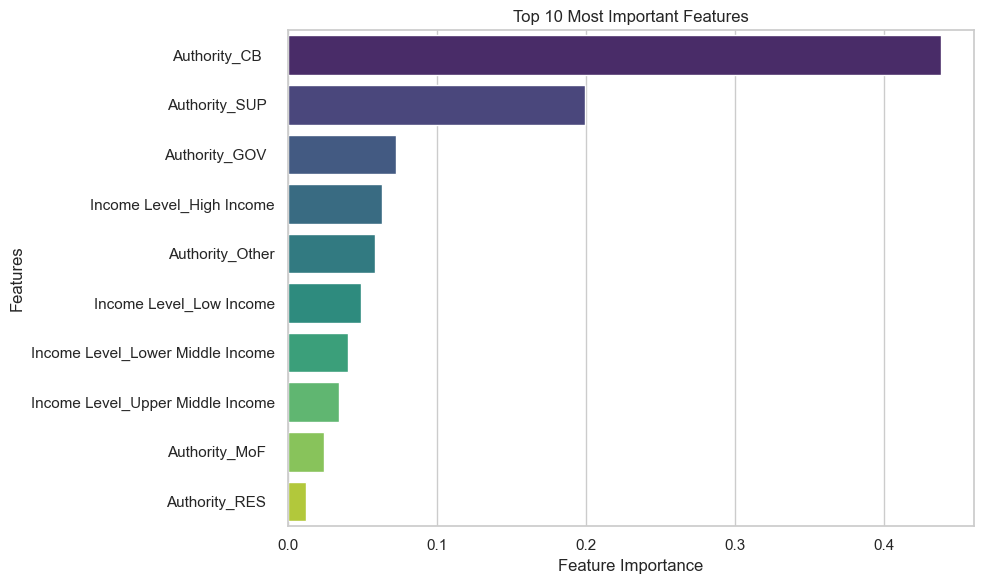

In [37]:
# Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer e imprimir la importancia
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


## 🔍 Model Comparison: Logistic Regression

We implemented Logistic Regression to serve as a baseline linear classifier. This model is generally less complex and interpretable, making it a good benchmark for performance comparison.

We'll evaluate its predictive power on the same features and test set used for the Random Forest model.


In [38]:
from sklearn.linear_model import LogisticRegression

# Train
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Accuracy (Logistic Regression): 0.5466998754669987

Classification Report (Logistic Regression):
                         precision    recall  f1-score   support

Banking sector               0.56      0.88      0.69       441
Financial Markets/NBFI       0.00      0.00      0.00       119
Insolvency                   0.00      0.00      0.00        15
Liquidity/funding            0.46      0.28      0.35       181
Payment systems              0.00      0.00      0.00        47

              accuracy                           0.55       803
             macro avg       0.20      0.23      0.21       803
          weighted avg       0.41      0.55      0.45       803


Confusion Matrix:
 [[388   0   0  53   0]
 [114   0   0   5   0]
 [ 15   0   0   0   0]
 [130   0   0  51   0]
 [ 44   0   0   3   0]]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

## 🌲 Model Training: Gradient Boosting Classifier

We use a Gradient Boosting Classifier to compare against the previous models. Gradient Boosting builds an ensemble of weak learners (typically decision trees), optimizing performance through iterative correction of prediction errors.

This model is known for handling class imbalance better than simpler models, especially when tuned correctly.

The model is trained using the same encoded features and evaluated on the same test set.


In [39]:
from sklearn.ensemble import GradientBoostingClassifier

# Train
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb.predict(X_test_scaled)

# Evaluate
print("Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Accuracy (Gradient Boosting): 0.5504358655043586

Classification Report (Gradient Boosting):
                         precision    recall  f1-score   support

Banking sector               0.57      0.86      0.68       441
Financial Markets/NBFI       0.58      0.09      0.16       119
Insolvency                   0.00      0.00      0.00        15
Liquidity/funding            0.46      0.28      0.35       181
Payment systems              0.25      0.02      0.04        47

              accuracy                           0.55       803
             macro avg       0.37      0.25      0.25       803
          weighted avg       0.51      0.55      0.48       803


Confusion Matrix:
 [[379   6   0  53   3]
 [103  11   0   5   0]
 [ 15   0   0   0   0]
 [130   0   0  51   0]
 [ 41   2   0   3   1]]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

## 🤖 Model Comparison & Conclusion

After training and evaluating three different classifiers (Random Forest, Logistic Regression, and Gradient Boosting), we can draw key comparisons based on accuracy, precision, recall, F1-score, and their confusion matrices.

### 📊 Summary of Results

| Model                | Accuracy | Precision (macro avg) | Recall (macro avg) | F1-score (macro avg) |
|---------------------|----------|------------------------|---------------------|-----------------------|
| Random Forest        | 0.55     | 0.39                   | 0.25                | 0.24                  |
| Logistic Regression  | 0.55     | 0.20                   | 0.23                | 0.21                  |
| Gradient Boosting    | 0.55     | 0.37                   | 0.25                | 0.25                  |

> 🔍 **Observation**: All three models yield similar overall accuracy (~55%), but **Random Forest** and **Gradient Boosting** consistently outperform **Logistic Regression** in macro precision and F1-score, especially for the dominant class **Banking sector**.

---

### ✅ Key Takeaways

- **Random Forest** and **Gradient Boosting** perform equally well in terms of accuracy and F1-score for dominant classes.
- **Logistic Regression** fails to generalize well for minority classes, showing almost zero predictive power on `Insolvency`, `Financial Markets/NBFI`, and `Payment systems`.
- **Gradient Boosting** slightly improves precision for the `Financial Markets/NBFI` class compared to Random Forest.
- All models suffer from **class imbalance**, affecting the recall and F1-scores of minority classes like `Insolvency`.

---

### 📌 Conclusion

While all models perform similarly in terms of global accuracy, **Gradient Boosting** appears to be slightly more balanced in performance across classes. However, further improvements could be made by:

- Applying **class balancing techniques** (e.g., SMOTE, class weights).
- Adding more informative **features** (e.g., temporal features, policy type strength).
- Performing **hyperparameter tuning** for better generalization.

The next step involves building an **interactive dashboard** to visualize these results and make them accessible to stakeholders.


📊 Model Performance Comparison
To better understand the relative performance of the three classification models tested—Random Forest, Logistic Regression, and Gradient Boosting—we summarize their evaluation metrics in a visual format.

The chart below compares key performance indicators for each model:

Accuracy: Overall correctness of the model's predictions.
Macro Precision: The ability of the model to avoid false positives across all classes, treating each class equally.
Macro Recall: The model’s ability to identify all true positives per class, regardless of class size.
Macro F1-score: The harmonic mean of precision and recall, giving a balanced view.
This visualization reveals important trade-offs between the models:

All models achieve similar accuracy (~55%), but vary significantly in how well they handle minority classes.
Random Forest performs best in terms of macro precision.
Gradient Boosting shows slightly better macro recall and F1-score, suggesting better handling of minority classes.
Logistic Regression lags behind in all metrics, likely due to the complexity and imbalance of the data.
🧠 Insight: While accuracy is important, models in imbalanced multi-class settings should also be judged by macro-averaged metrics to ensure fair performance across all categories.

/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_27380/2092756837.py:39: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
/Users/juanpardo/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


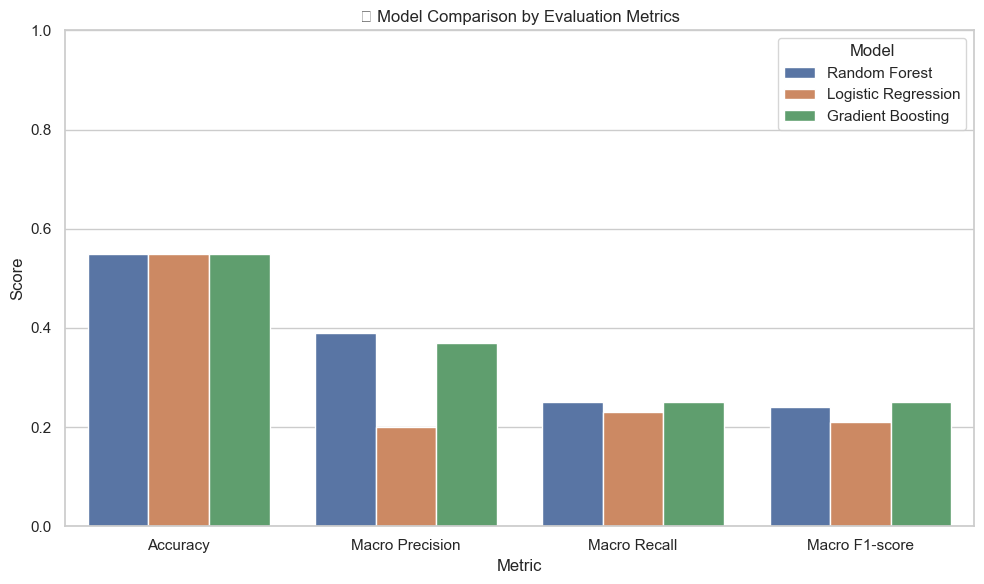

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Metrics obtained with the classification report of the model set 
model_scores = {
    'Random Forest': {
        'Accuracy': 0.55,
        'Macro Precision': 0.39,
        'Macro Recall': 0.25,
        'Macro F1-score': 0.24
    },
    'Logistic Regression': {
        'Accuracy': 0.55,
        'Macro Precision': 0.20,
        'Macro Recall': 0.23,
        'Macro F1-score': 0.21
    },
    'Gradient Boosting': {
        'Accuracy': 0.55,
        'Macro Precision': 0.37,
        'Macro Recall': 0.25,
        'Macro F1-score': 0.25
    }
}

# Convert into a dataframe in order to generate the plotting set
scores_df = pd.DataFrame(model_scores).T.reset_index().rename(columns={'index': 'Model'})

# Convert for seaborn into a long format
scores_long = pd.melt(scores_df, id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=scores_long, x='Metric', y='Score', hue='Model')
plt.title('🔍 Model Comparison by Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


🔍 Confusion Matrix Comparison

To further analyze the model performance, we visualize and compare the confusion matrices for each of the three models: Random Forest, Logistic Regression, and Gradient Boosting.

Key Observations:

Random Forest:

Performs best for the "Banking sector" class, with 383 correctly classified cases.
Shows some ability to classify other classes, such as "Liquidity/funding" and "Financial Markets/NBFI", but with notable confusion.


Logistic Regression:

Highly biased toward the dominant class ("Banking sector").
Completely fails to identify minority classes such as "Insolvency" and "Payment systems", as evidenced by the absence of correct predictions for these categories.


Gradient Boosting:
Comparable overall performance to Random Forest.
Slightly better precision for "Financial Markets/NBFI" (11 correct predictions) but still suffers from poor classification of minority classes.


Conclusion:

The confusion matrices reveal a significant class imbalance problem. While models like Random Forest and Gradient Boosting capture dominant classes with high accuracy, they underperform on underrepresented classes. Addressing class imbalance (e.g., using SMOTE, class weights, or resampling techniques) could lead to improved performance across all categories.

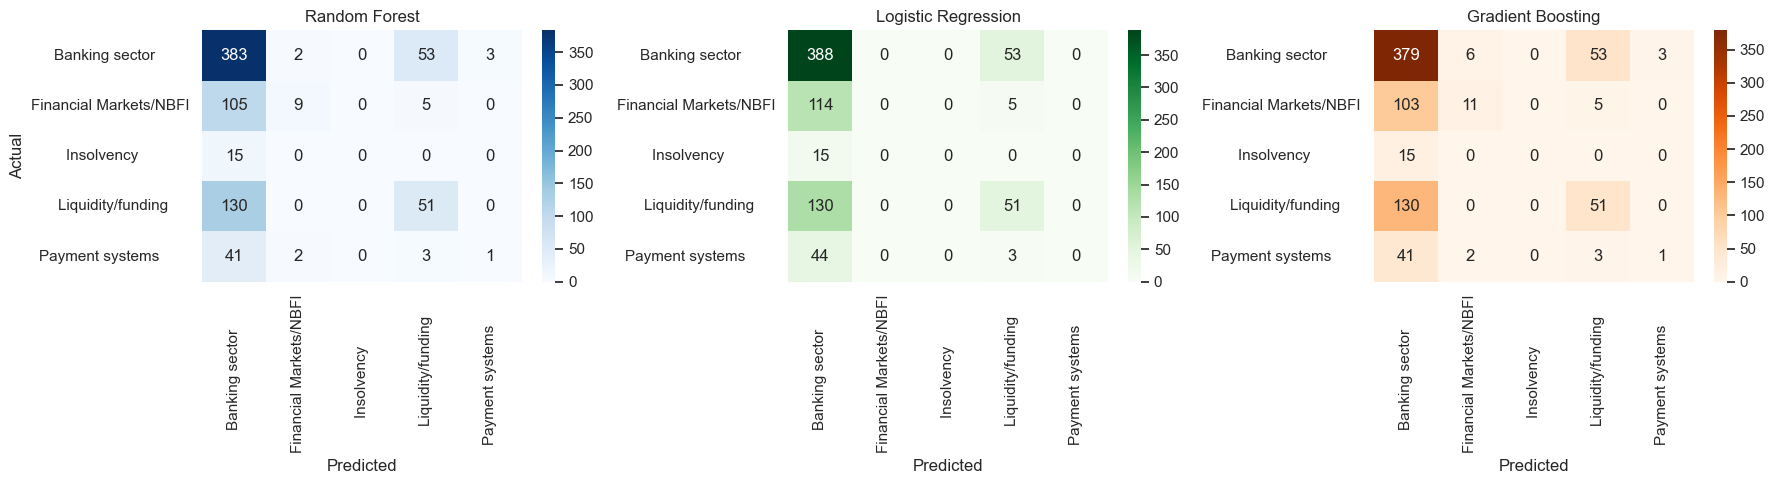

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Compute confusion matrices
cm_rf = confusion_matrix(y_test, y_pred)           # Random Forest
cm_lr = confusion_matrix(y_test, y_pred_lr)        # Logistic Regression
cm_gb = confusion_matrix(y_test, y_pred_gb)        # Gradient Boosting

# 2. Class labels
labels = le.classes_

# 3. Plot side-by-side confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=labels, yticklabels=labels)
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', ax=axes[1], xticklabels=labels, yticklabels=labels)
axes[1].set_title('Logistic Regression')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('')

# Gradient Boosting
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges', ax=axes[2], xticklabels=labels, yticklabels=labels)
axes[2].set_title('Gradient Boosting')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


In [43]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


📊 Interactive Model Evaluation Dashboard
To facilitate a deeper understanding of each model's performance, we developed an interactive dashboard using Plotly and ipywidgets. This dashboard allows users to:

Select a model from a dropdown menu.
Visualize its performance metrics: Accuracy, Macro Precision, Macro Recall, and Macro F1-score.
Compare models dynamically with visually enhanced bar plots.
This tool is ideal for:

Presentations to non-technical stakeholders.
Rapid prototyping and exploration.
Highlighting model trade-offs in precision and recall.
Key Benefits:

The dashboard supports quick comparison without rerunning evaluations.
Clean, modern UI with color-coded bars and score annotations.
Extensible for additional models or metrics in future iterations.

In [47]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Define model performance data
data = {
    "Metric": ["Accuracy", "Macro Precision", "Macro Recall", "Macro F1-score"],
    "Random Forest": [0.55, 0.39, 0.25, 0.24],
    "Logistic Regression": [0.55, 0.20, 0.23, 0.21],
    "Gradient Boosting": [0.55, 0.37, 0.25, 0.25]
}
df_scores = pd.DataFrame(data)

# Dropdown selector
model_selector = widgets.Dropdown(
    options=["Random Forest", "Logistic Regression", "Gradient Boosting"],
    description="Model:"
)

# Plotting function
def update_chart(model):
    fig = px.bar(
        df_scores,
        x="Metric",
        y=model,
        title=f"{model} - Evaluation Metrics",
        labels={model: "Score"},
        range_y=[0, 1],
        text_auto=True
    )
    fig.show()

# Display the dashboard
widgets.interact(update_chart, model=model_selector)


interactive(children=(Dropdown(description='Model:', options=('Random Forest', 'Logistic Regression', 'Gradien…

<function __main__.update_chart(model)>